# Trajectory Generation

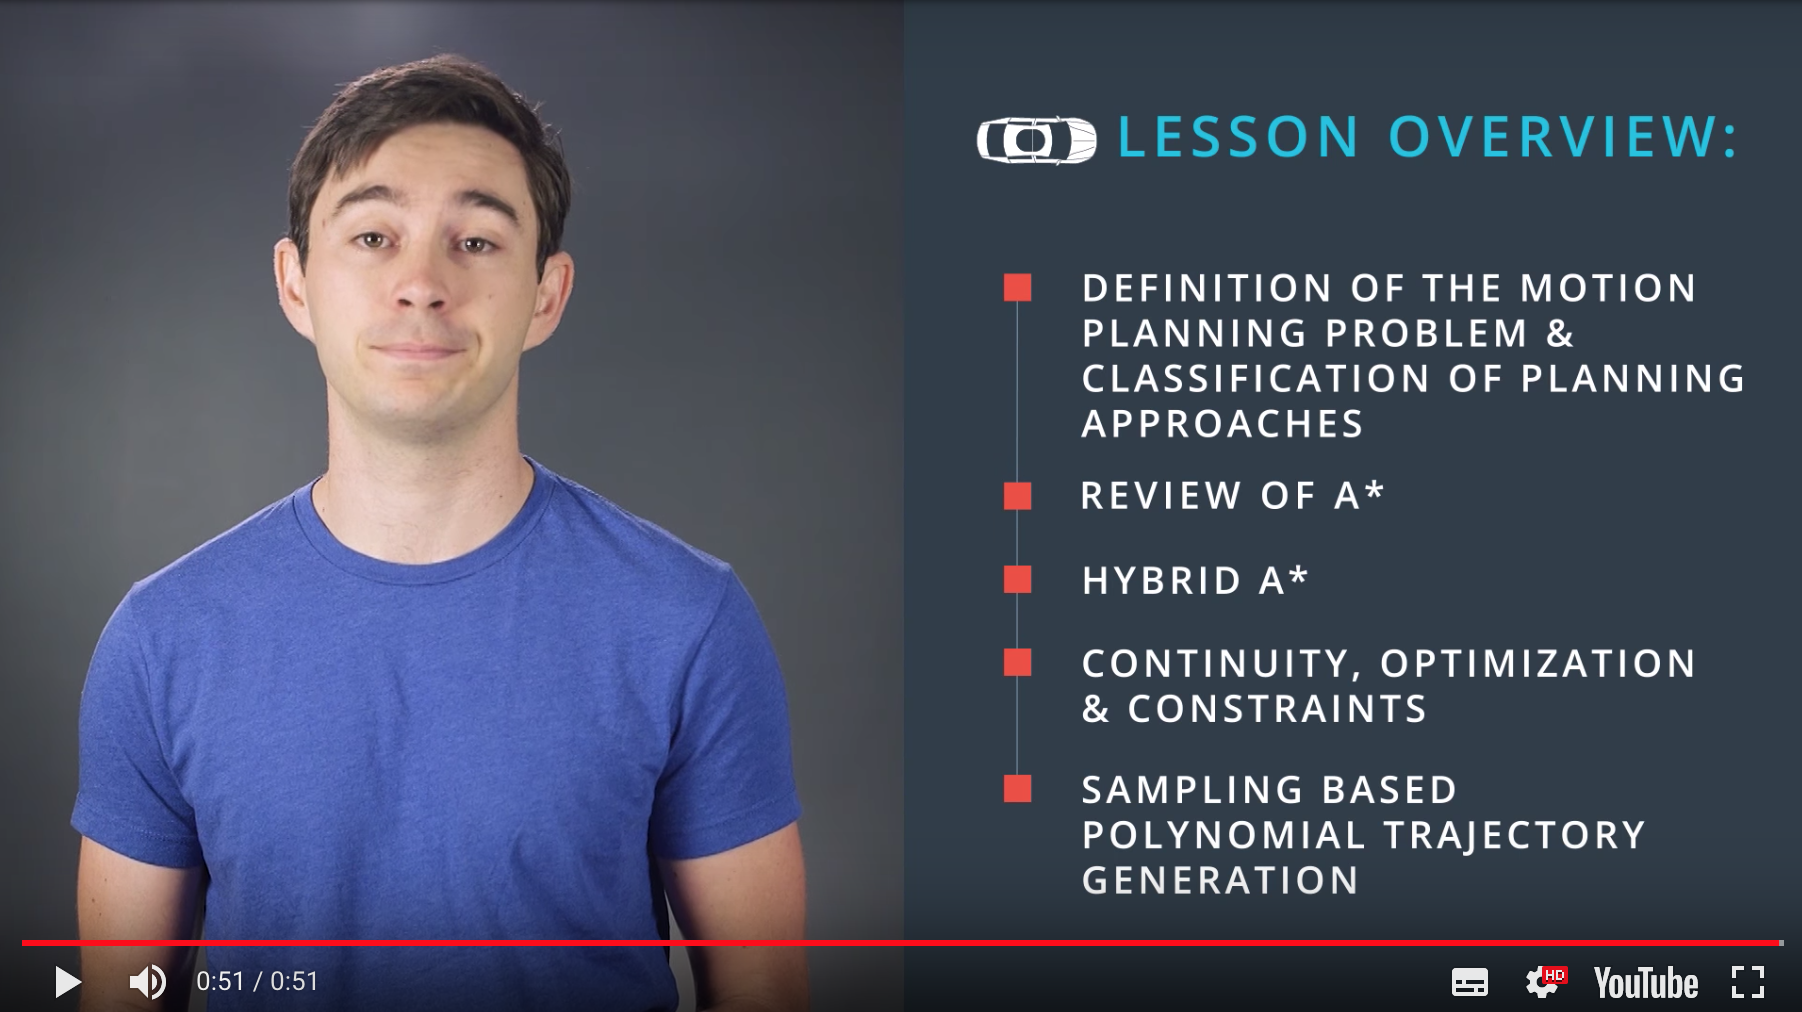

## 1. The Motion Planning Problem

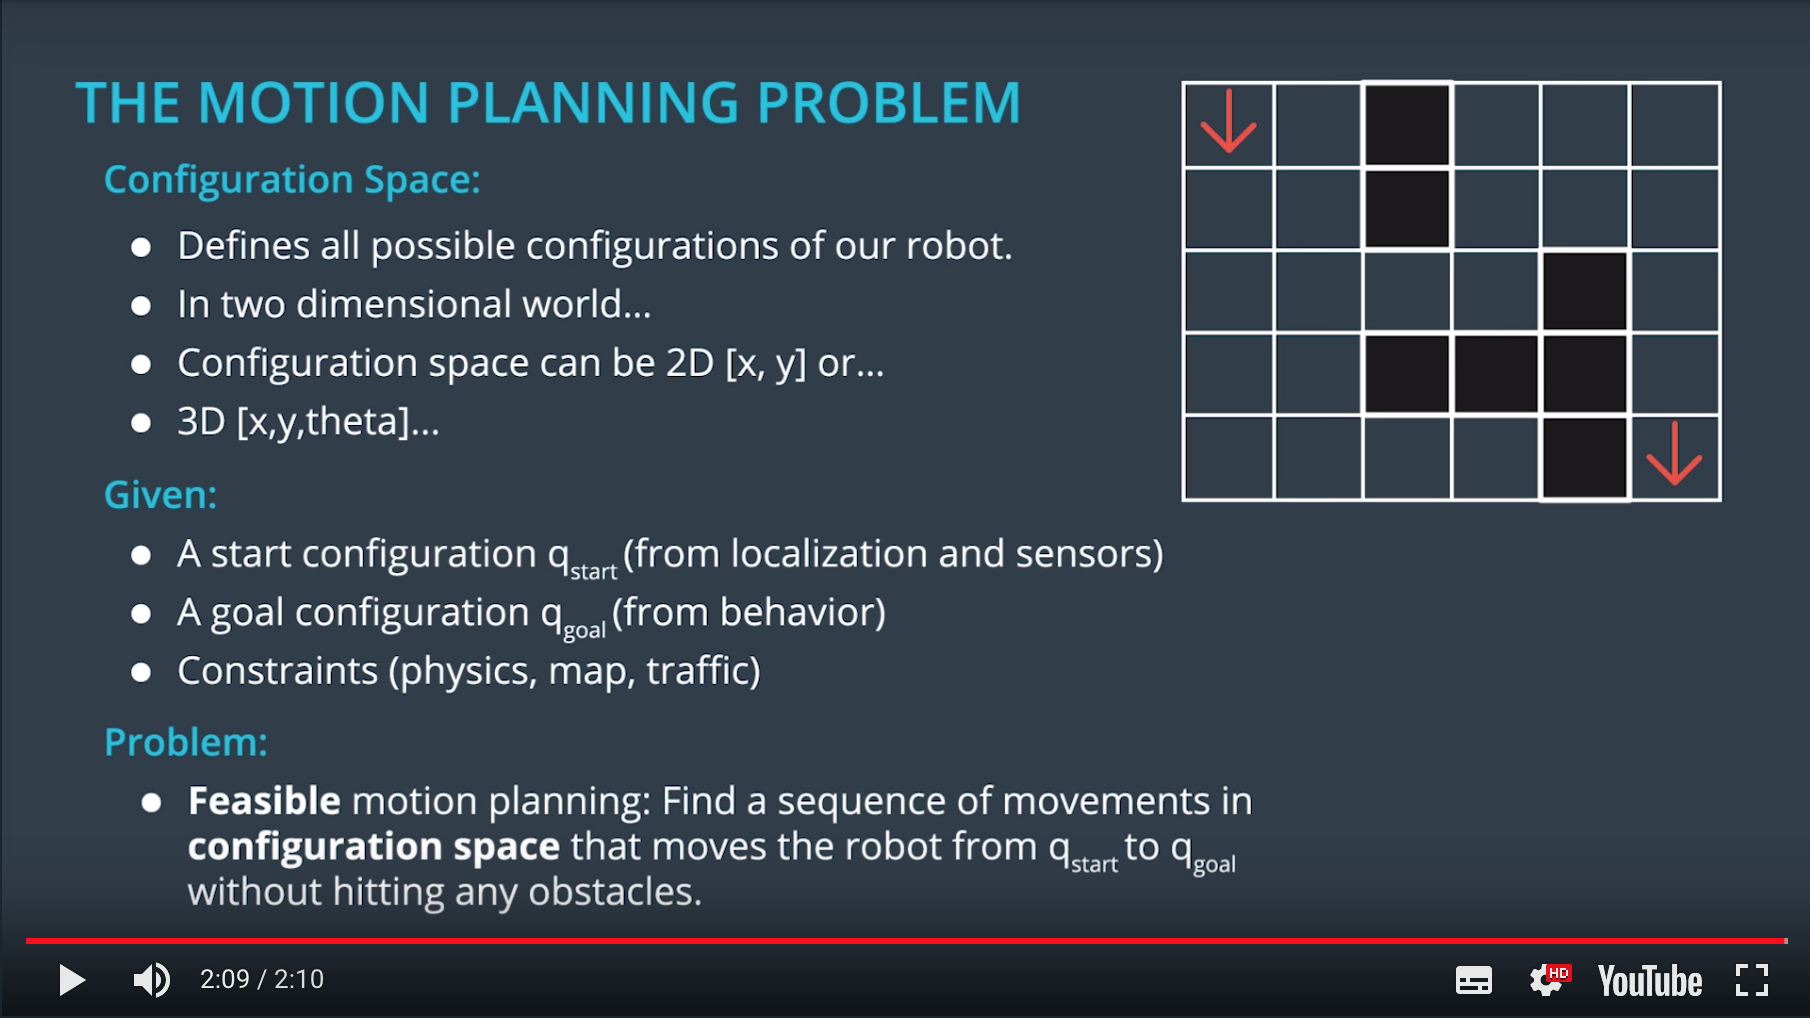

## 2. Properties of Motion Planning Algorithms

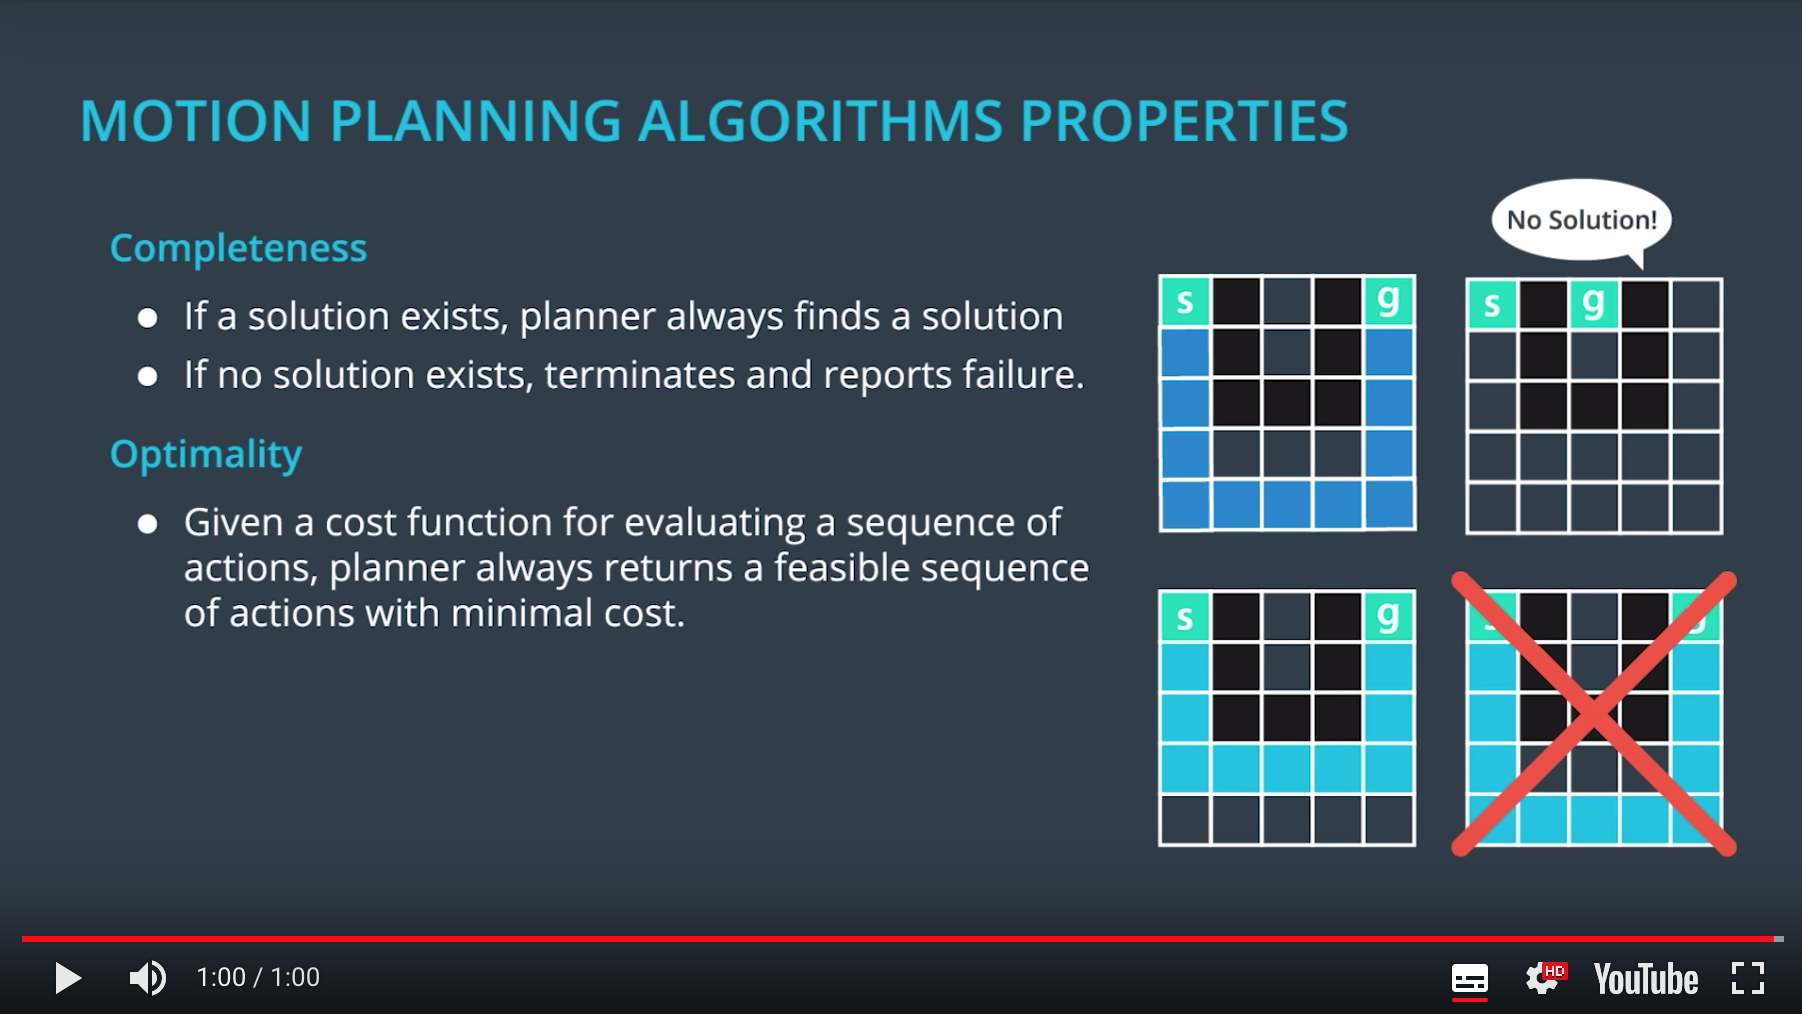

## 3. Types of Motion Planning Algorithms

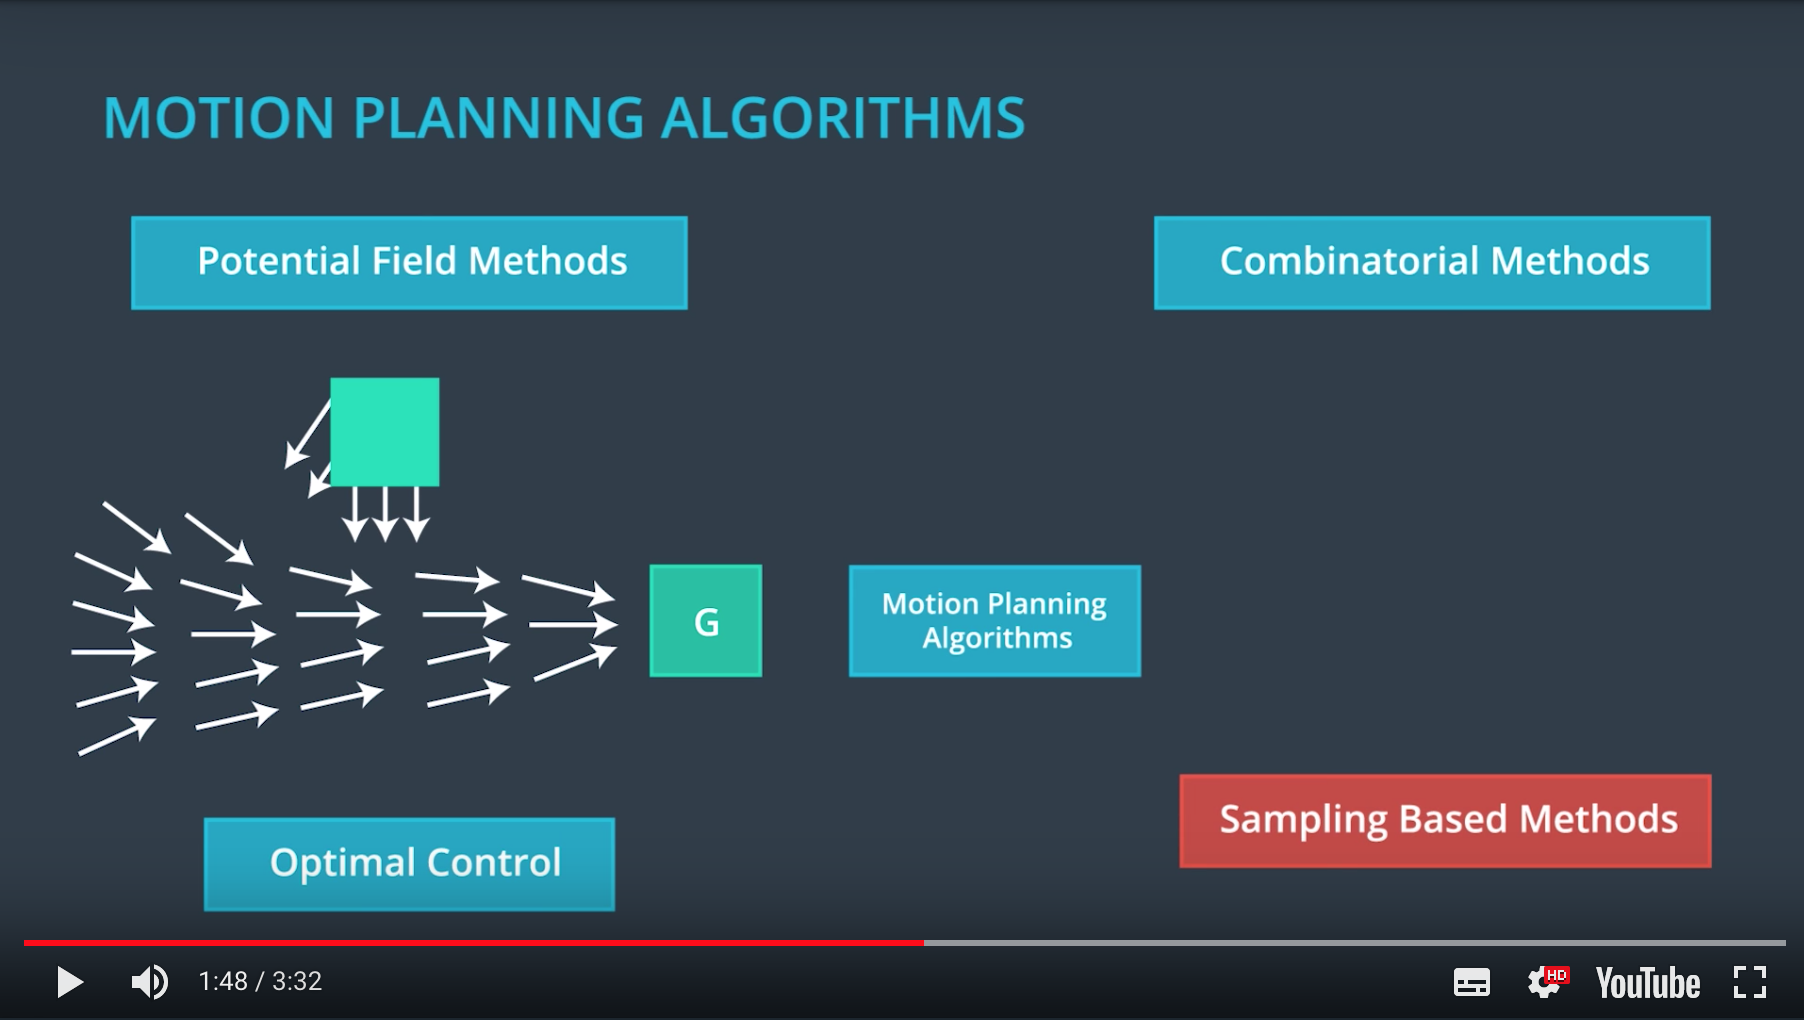

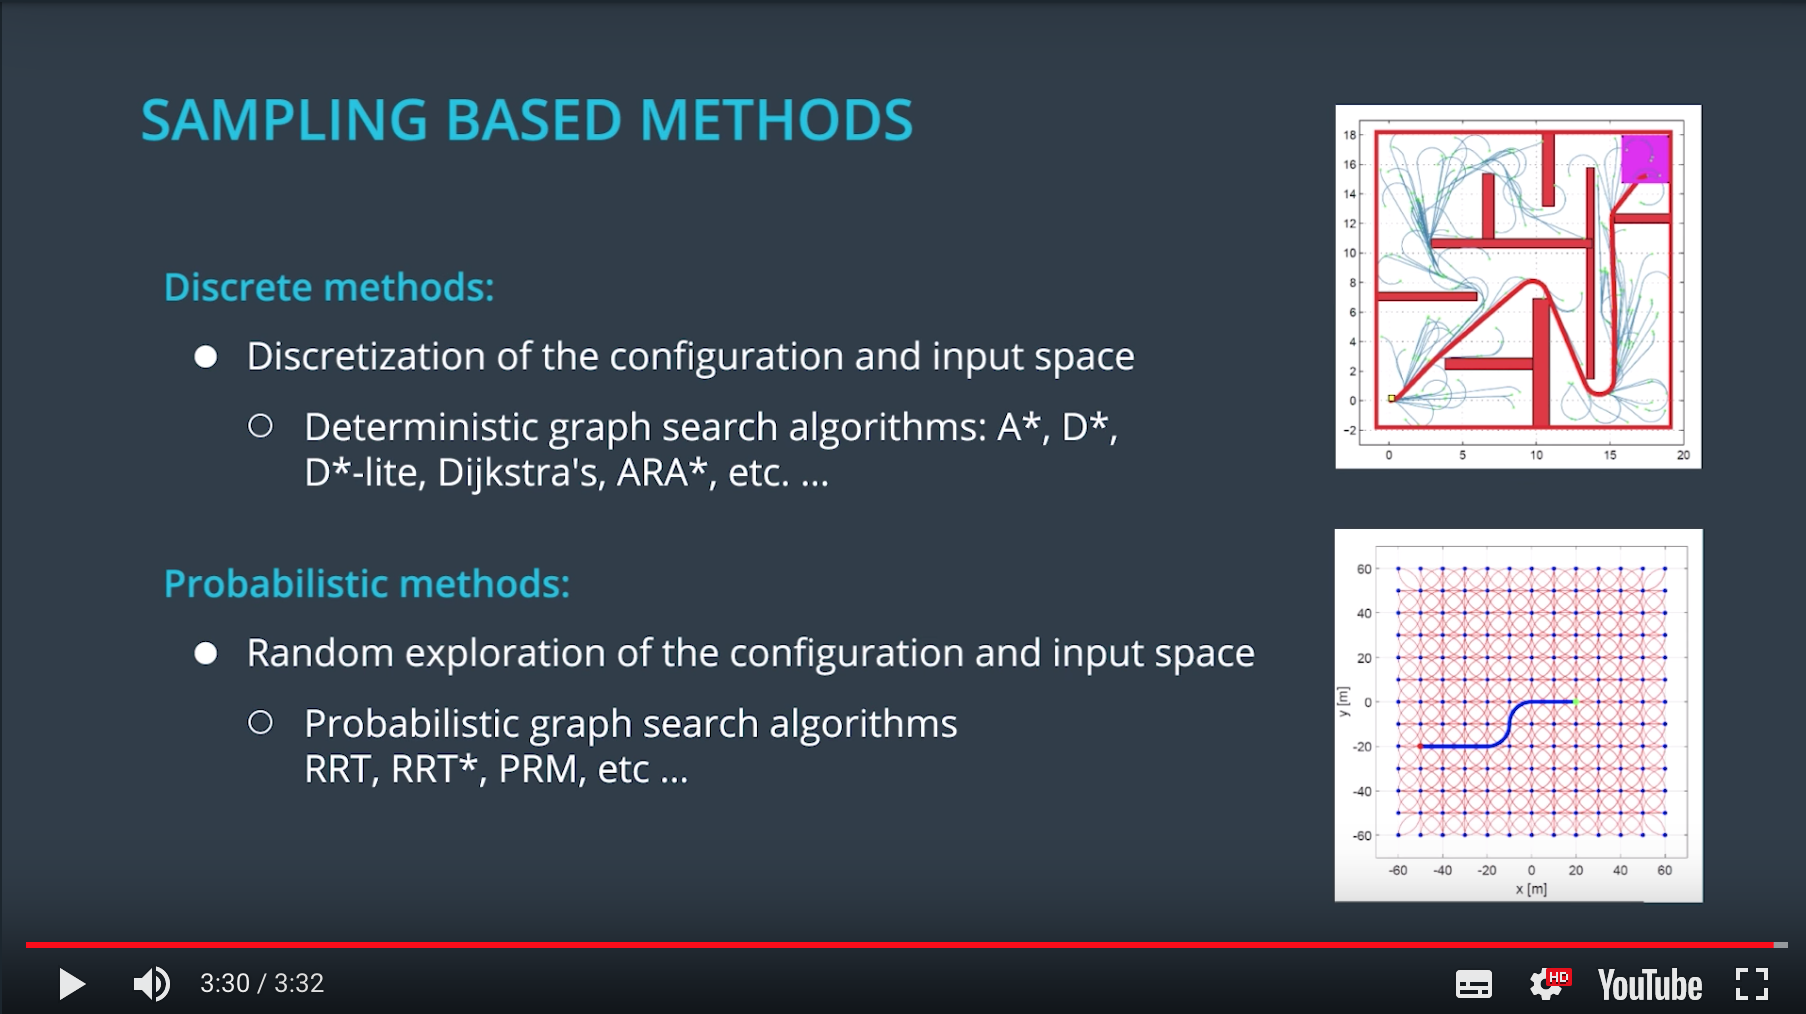

## 4. A* Reminder

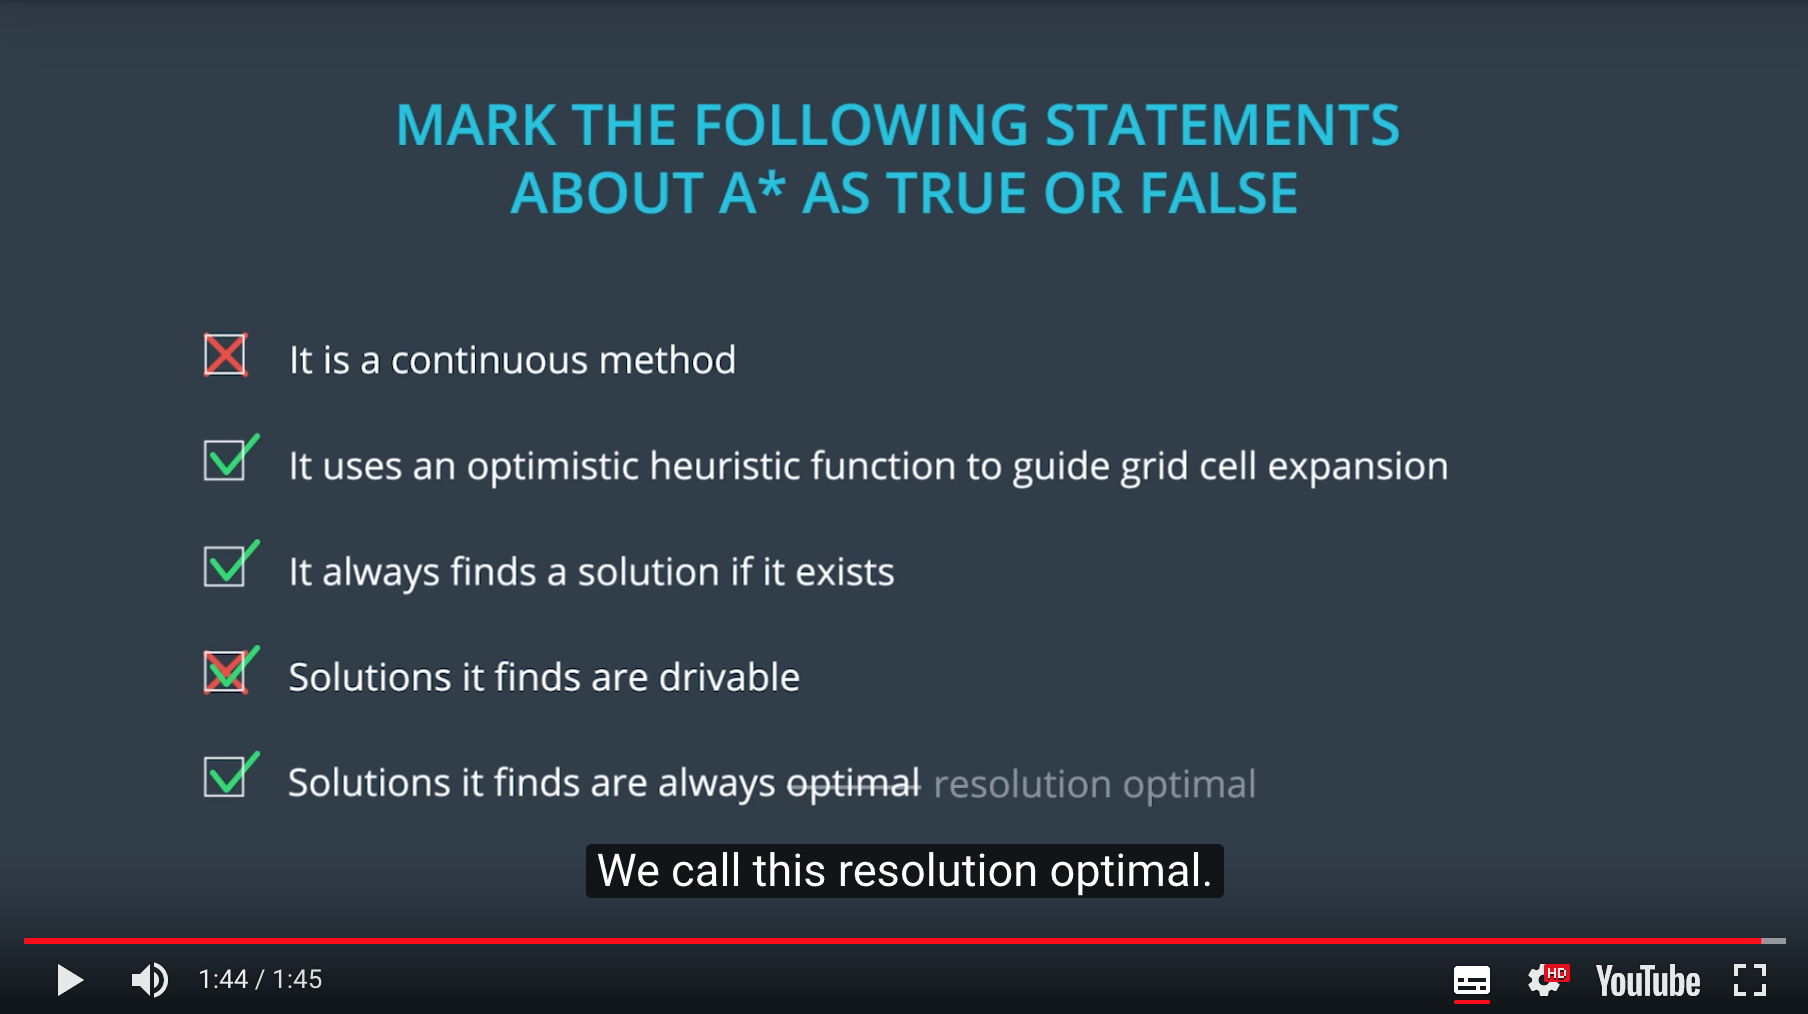

#### Note Regarding A* Heuristics and Optimal Solutions:
A* will find an optimal solution if the heuristic is [Admissible](https://en.wikipedia.org/wiki/Admissible_heuristic). A* may find a suboptimal path if the heuristic function is not Admissible.

## 5. Hybrid A*

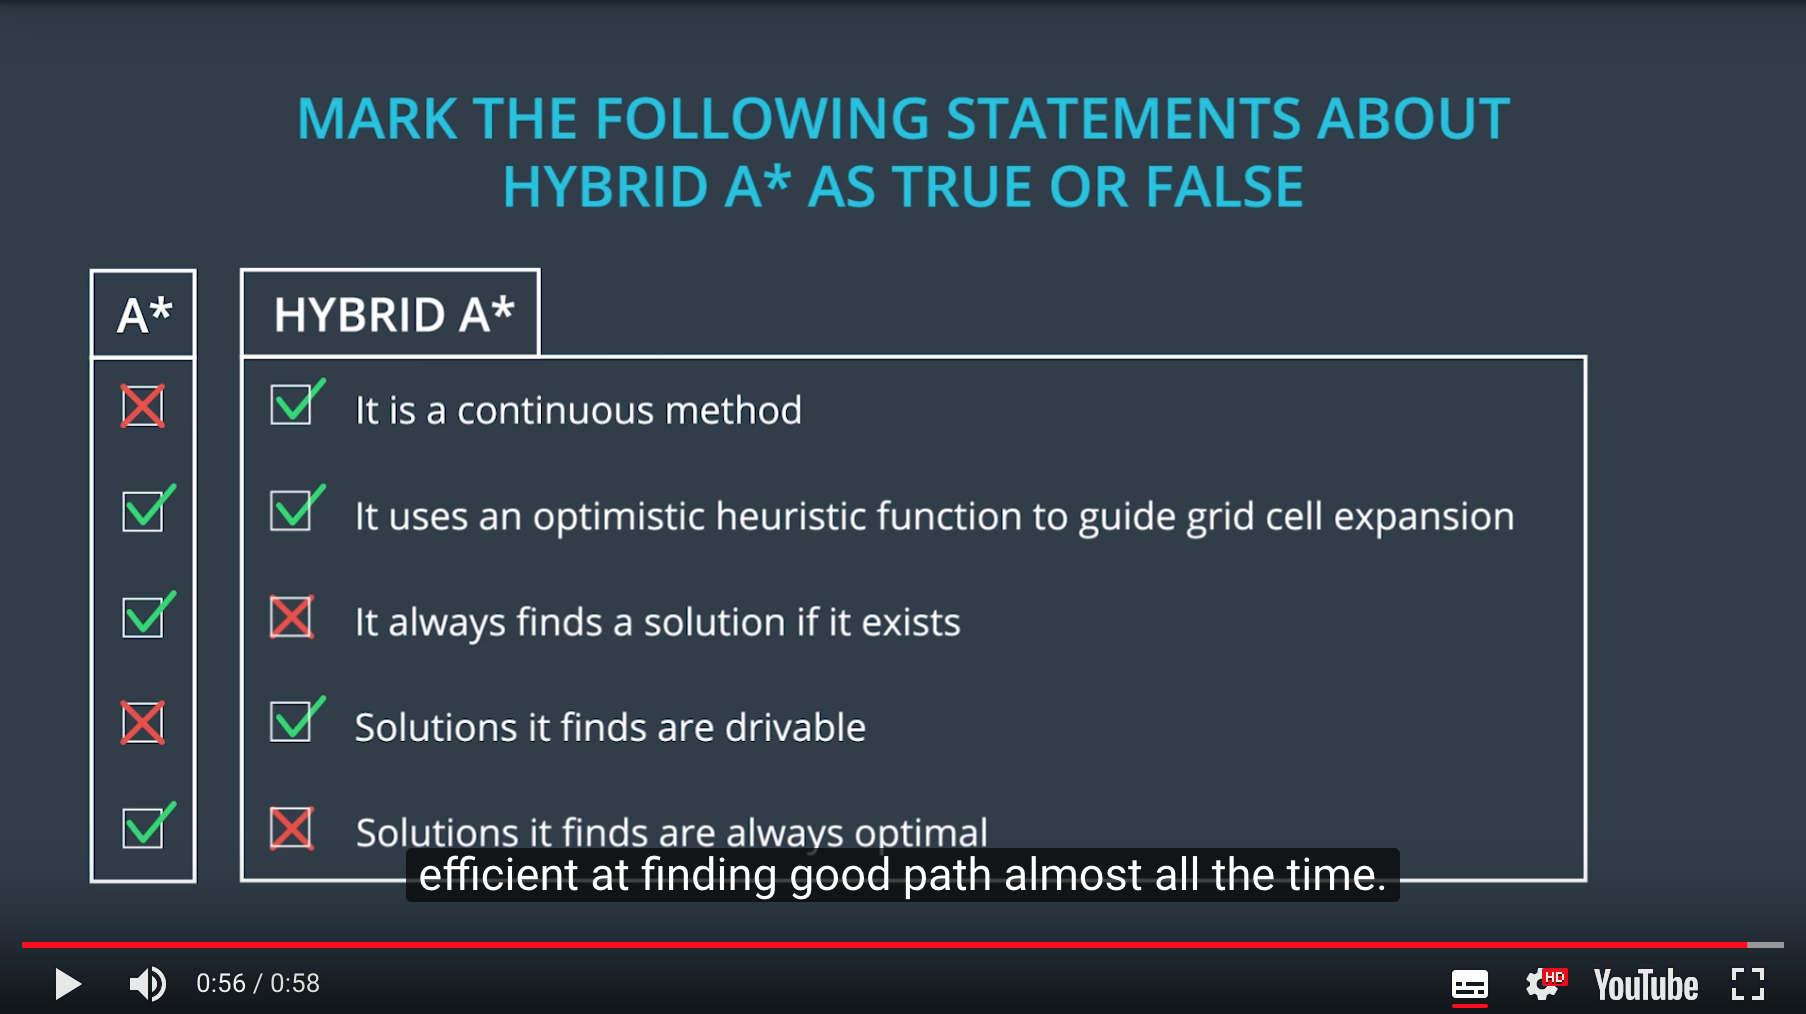

## 6. Hybrid A* Heuristics

The paper [Junior: The Stanford Entry in the Urban Challenge](https://d17h27t6h515a5.cloudfront.net/topher/2017/July/595fe838_junior-the-stanford-entry-in-the-urban-challenge/junior-the-stanford-entry-in-the-urban-challenge.pdf) is a good read overall, but Section 6.3 - Free Form Navigation is especially good and goes into detail about how the Stanford team thought about heuristics for their Hybrid A* algorithm (which they tended to use in parking lots).

max(h1, h2)

## 7. Hybrid A* Pseudocode

The pseudocode below outlines an implementation of the A* search algorithm using the bicycle model. The following variables and objects are used in the code but not defined there:

* `State(x, y, theta, g, f)`: An object which stores `x`, `y` coordinates, direction `theta`, and current `g` and `f` values.
* `grid`: A 2D array of 0s and 1s indicating the area to be searched. 1s correspond to obstacles, and 0s correspond to free space.
* `SPEED`: The speed of the vehicle used in the bicycle model.
* `LENGTH`: The length of the vehicle used in the bicycle model.
* `NUM_THETA_CELLS`: The number of cells a circle is divided into. This is used in keeping track of which States we have visited already.

The bulk of the hybrid A* algorithm is contained within the `search` function. The `expand` function takes a state and goal as inputs and returns a list of possible next states for a range of steering angles. This function contains the implementation of the bicycle model and the call to the A* heuristic function.

```python
def expand(state, goal):
    next_states = []
    for delta in range(-35, 40, 5): 
        # Create a trajectory with delta as the steering angle using 
        # the bicycle model:

        # ---Begin bicycle model---
        delta_rad = deg_to_rad(delta)
        omega = SPEED/LENGTH * tan(delta_rad)
        next_x = state.x + SPEED * cos(theta)
        next_y = state.y + SPEED * sin(theta)
        next_theta = normalize(state.theta + omega)
        # ---End bicycle model-----

        next_g = state.g + 1
        next_f = next_g + heuristic(next_x, next_y, goal)

        # Create a new State object with all of the "next" values.
        state = State(next_x, next_y, next_theta, next_g, next_f)
        next_states.append(state)

    return next_states

def search(grid, start, goal):
    # The opened array keeps track of the stack of States objects we are 
    # searching through.
    opened = []
    # 3D array of zeros with dimensions:
    # (NUM_THETA_CELLS, grid x size, grid y size).
    closed = [[[0 for x in range(grid[0])] for y in range(len(grid))] 
        for cell in range(NUM_THETA_CELLS)]
    # 3D array with same dimensions. Will be filled with State() objects 
    # to keep track of the path through the grid. 
    came_from = [[[0 for x in range(grid[0])] for y in range(len(grid))] 
        for cell in range(NUM_THETA_CELLS)]

    # Create new state object to start the search with.
    x = start.x
    y = start.y
    theta = start.theta
    g = 0
    f = heuristic(start.x, start.y, goal)
    state = State(x, y, theta, 0, f)
    opened.append(state)

    # The range from 0 to 2pi has been discretized into NUM_THETA_CELLS cells. 
    # Here, theta_to_stack_number returns the cell that theta belongs to. 
    # Smaller thetas (close to 0 when normalized  into the range from 0 to 
    # 2pi) have lower stack numbers, and larger thetas (close to 2pi when 
    # normalized) have larger stack numbers.
    stack_num = theta_to_stack_number(state.theta)
    closed[stack_num][index(state.x)][index(state.y)] = 1

    # Store our starting state. For other states, we will store the previous 
    # state in the path, but the starting state has no previous.
    came_from[stack_num][index(state.x)][index(state.y)] = state

    # While there are still states to explore:
    while opened:
        # Sort the states by f-value and start search using the state with the 
        # lowest f-value. This is crucial to the A* algorithm; the f-value 
        # improves search efficiency by indicating where to look first.
        opened.sort(key=lambda state:state.f)
        current = opened.pop(0)

        # Check if the x and y coordinates are in the same grid cell 
        # as the goal. (Note: The idx function returns the grid index for 
        # a given coordinate.)
        if (idx(current.x) == goal[0]) and (idx(current.y) == goal.y):
            # If so, the trajectory has reached the goal.
            return path

        # Otherwise, expand the current state to get a list of possible 
        # next states.
        next_states = expand(current, goal)
        for next_s in next_states:
            # If we have expanded outside the grid, skip this next_s.
            if next_s is not in the grid:
                continue
            # Otherwise, check that we haven't already visited this cell and
            # that there is not an obstacle in the grid there.
            stack_num = theta_to_stack_number(next_s.theta)
            if closed[stack_num][idx(next_s.x)][idx(next_s.y)] == 0 
                and grid[idx(next_s.x)][idx(next_s.y)] == 0:
                # The state can be added to the opened stack.
                opened.append(next_s)
                # The stack_number, idx(next_s.x), idx(next_s.y) tuple 
                # has now been visited, so it can be closed.
                closed[stack_num][idx(next_s.x)][idx(next_s.y)] = 1
                # The next_s came from the current state, and is recorded.
                came_from[stack_num][idx(next_s.x)][idx(next_s.y)] = current
```

## 8. Implementing Hybrid A*

In this exercise, you will be provided a working implementation of a breadth first search algorithm which does not use any heuristics to improve its efficiency. Your goal is to try to make the appropriate modifications to the algorithm so that it takes advantage of heuristic functions (possibly the ones mentioned in the previous paper) to reduce the number of grid cell expansions required.

### Instructions:
Modify the code in `hybrid_breadth_first.cpp` and hit `Test Run` to check your results.
Note the number of expansions required to solve an empty 15x15 grid (it should be about 18,000!). Modify the code to try to reduce that number. How small can you get it?
